In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Unsupervised Learning Models

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# load the housing data
housing_data = pd.read_csv('../data/housing/housing_data_cleaned.csv')
print(housing_data.isnull().sum())
#select features for clustering except sale price
features = housing_data.columns.drop('SalePrice')
#standardize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(housing_data[features])
print(normalized_features[:5])

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Full Bath         0
Year Built        0
Year Remod/Add    0
TotRms AbvGrd     0
Lot Area          0
Fireplaces        0
BsmtFin SF 1      0
MS SubClass       0
Lot Frontage      0
SalePrice         0
dtype: int64
[[-0.06725371  0.30926506  0.3065895   0.25668447  0.06444434  1.26700334
  -0.78318531 -1.02479289 -0.37553701 -1.16348813  0.35416673  2.74438073
   2.16218005  0.43117085 -0.87700484  3.36691056]
 [-0.7760788  -1.19442705 -1.00864802  1.19633674 -0.38508094 -0.67264301
  -0.78318531 -1.02479289 -0.34246845 -1.11554197 -0.9175349   0.18709726
  -0.92514332  0.0557059  -0.87700484  0.50546338]
 [-0.06725371 -0.33771825 -1.00864802 -0.74809222  0.62975644  0.43244497
  -0.78318531 -1.02479289 -0.44167415 -1.25938046 -0.28168408  0.5228137
  -0.92514332  1.05475006 -0.87700484  0.55237235]
 [ 0.64157138  1.20752324  0.3065895   0.228774    

# Determining the Optimal Number of Clusters/Components

### KMeans

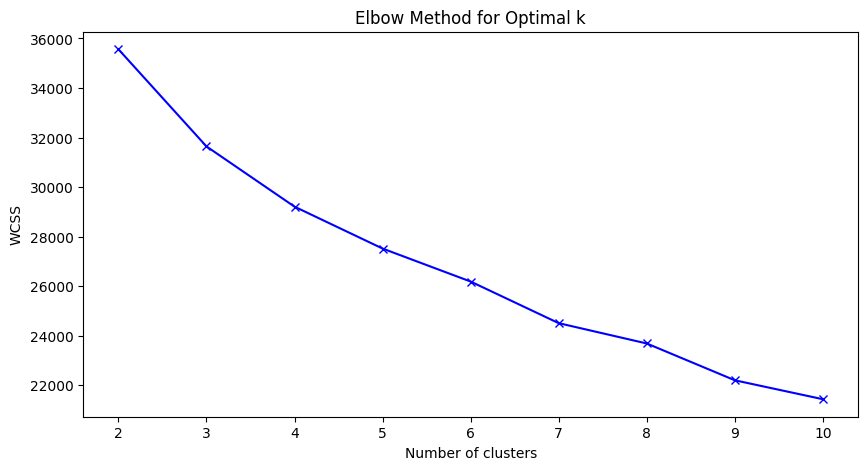

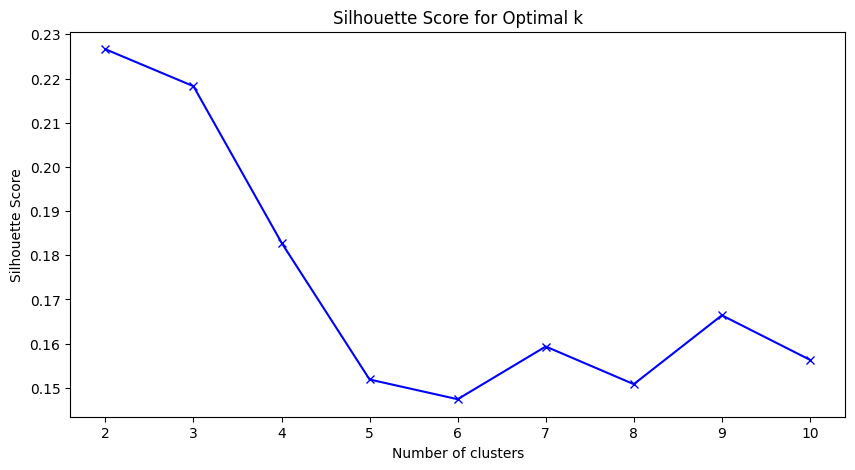

Optimal number of clusters for the housing data: 2


In [10]:
from sklearn.cluster import KMeans

# function to find optimal number of clusters
def optimal_kmeans_clusters(features):
    wcss = []
    silhouette_scores = []
    cluster_range = range(2, 11)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(features, kmeans.labels_))
    
    plt.figure(figsize=(10, 5))
    plt.plot(cluster_range, wcss, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(cluster_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.show()

    optimal_k = cluster_range[np.argmax(silhouette_scores)]
    return optimal_k

# Determining the optimal number of clusters
optimal_k = optimal_kmeans_clusters(normalized_features)
print(f'Optimal number of clusters for the housing data: {optimal_k}')


### Gaussian Mixture Model (EM)

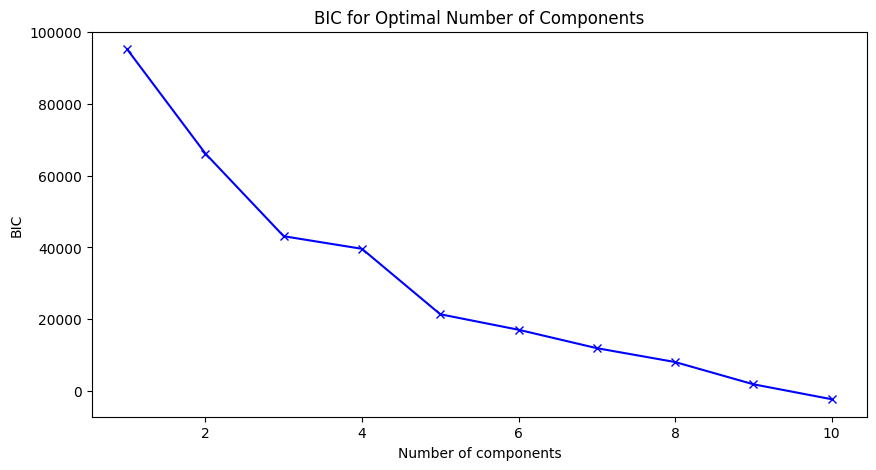

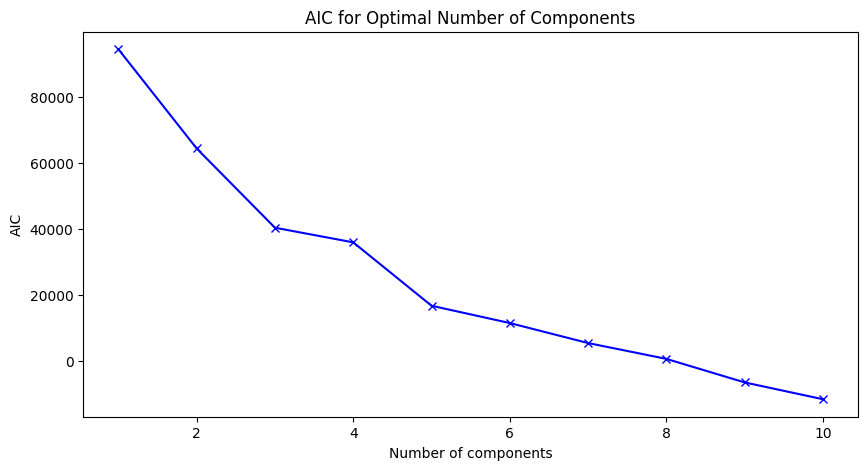

Optimal number of components for the housing data using AIC: 10
Optimal number of components for the housing data using BIC: 10


In [11]:
# find optimal components for GMM
def optimal_gmm_components(features):
    bic_scores = []
    aic_scores = []
    component_range = range(1, 11)
    for i in component_range:
        gmm = GaussianMixture(n_components=i, random_state=42)
        gmm.fit(features)
        bic_scores.append(gmm.bic(features))
        aic_scores.append(gmm.aic(features))

    plt.figure(figsize=(10, 5))
    plt.plot(component_range, bic_scores, 'bx-')
    plt.xlabel('Number of components')
    plt.ylabel('BIC')
    plt.title('BIC for Optimal Number of Components')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(component_range, aic_scores, 'bx-')
    plt.xlabel('Number of components')
    plt.ylabel('AIC')
    plt.title('AIC for Optimal Number of Components')
    plt.show()

    optimal_components_aic = component_range[np.argmin(aic_scores)]
    optimal_components_bic = component_range[np.argmin(bic_scores)]
    return optimal_components_aic, optimal_components_bic

# Determining the optimal number of components
optimal_components_aic, optimal_components_bic = optimal_gmm_components(normalized_features)
print(f'Optimal number of components for the housing data using AIC: {optimal_components_aic}')
print(f'Optimal number of components for the housing data using BIC: {optimal_components_bic}')

## Running Clustering Algorithms

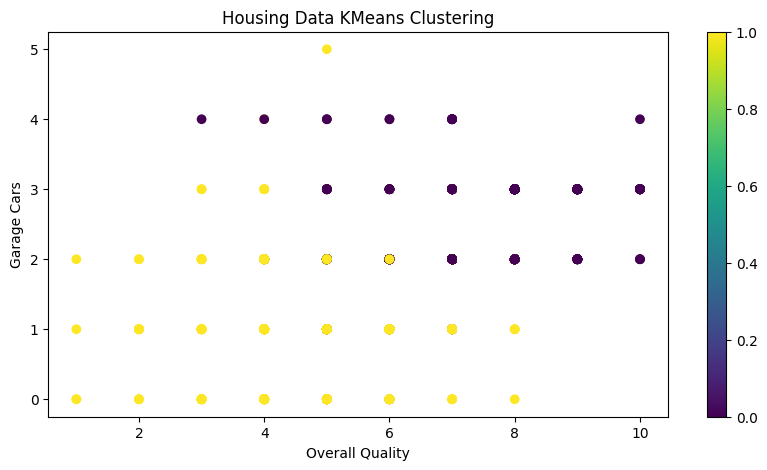

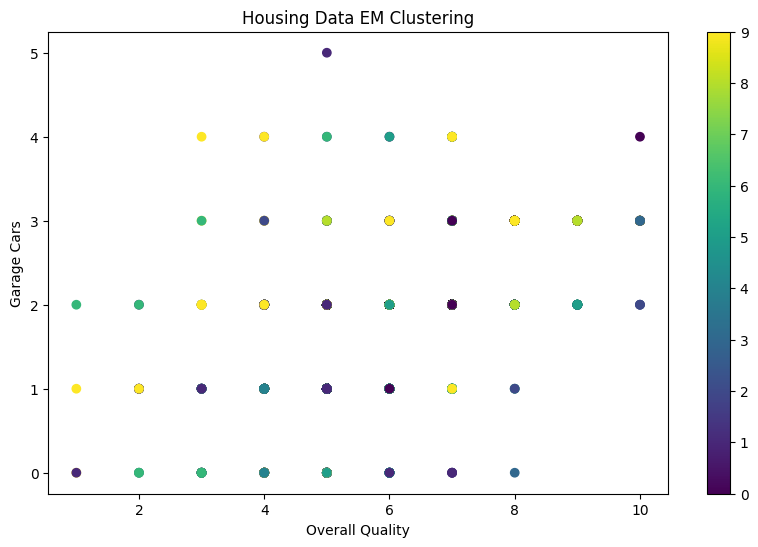

In [12]:
kmeans_housing = KMeans(n_clusters=optimal_k, random_state=42)
housing_kmeans_clusters = kmeans_housing.fit_predict(normalized_features)

# Add cluster labels to the original housing data
housing_data['KMeans_Cluster'] = housing_kmeans_clusters

# Plot kmeans clusters
plt.figure(figsize=(10, 5))
plt.scatter(housing_data['Overall Qual'], housing_data['Garage Cars'], c=housing_kmeans_clusters, cmap='viridis',marker='o')
plt.xlabel('Overall Quality')
plt.ylabel('Garage Cars')
plt.title('Housing Data KMeans Clustering')
plt.colorbar()
plt.show()

# Run GMM with optimal components
em_housing = GaussianMixture(n_components=optimal_components_bic, random_state=42)
housing_em_clusters = em_housing.fit_predict(normalized_features)

# add the cluster labels to the original housing data
housing_data['EM_Cluster'] = housing_em_clusters

# Plot EM clusters  
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['Overall Qual'], housing_data['Garage Cars'], c=housing_em_clusters, cmap='viridis',marker='o')
plt.xlabel('Overall Quality')
plt.ylabel('Garage Cars')
plt.title('Housing Data EM Clustering')
plt.colorbar()
plt.show()
